In [3]:
#=
Encabezado para la funcion valor absoluto
=#

function absoluto(x)
    if x< 0
        x=-x
    end
    return x
end



#= Esta función calcula la raíz cuadrada de un número real

Datos de entrada: x - Real
Datos de salida: x - Real

a = x
b = 1

mientras |a-b| > Tol

      a + b
a =------------
        2

          x
b = -------------
          2

Mostrar a

println(raizc(4)) -> 2.0
=#

function raizc(x,tol)
    a=x
    b=1
    while absoluto(a-b) > tol
        a=(a+b)/2
        b=x/a
    end
    println(a,b)
    return a
end

println(raizc(4,.0001))

2.00000009292229471.9999999070777095
2.0000000929222947


### Modificaciones para numeros negativos (resultados complejos)

Para evitar algoritmos que no terminan podemos poner condiciones para parar:
1. Contar numero de iteraciones
2. Ver si esta convergiendo: nuestra diferencia va creciendo

In [12]:
function raizc_2(x,tol)
    a=x
    b=1
    img = 1.0
    if x < 0
        img = 1im
        x = -x
    end
    while absoluto(a-b) > tol
        a=(a+b)/2
        b=x/a
    end
    #println(a,b)
    return a*img
end

println(raizc_2(10,.0001))

3.162277665175675


In [14]:
sqrt(-10+0im)

0.0 + 3.1622776601683795im

## Retomando la funcion de integracion.

Podemos automatizar las sumas con
1. While
2. For

### Implementacion con for:

In [1]:
function f(x)
   #return x*x #Para el cuadrado
    4/(1+x*x)
end

#= Datos de entrada
f(x)=x^2 #una función, intervalo y número de divisiones (intervalos) asignados:
Datos de entrada:
A es un numero real
B es un numero real
Datos de salida
Resultados es un numero real
=#

function integral_cuadrada(A,B,n)
    Pasos=n
    δ=(B-A)/Pasos
    x=A
    suma_acum=0.
    for i in range(0,Pasos)
        suma_acum+=f(x+δ/2)
        x=i*δ
    end
    suma_acum=suma_acum*δ
    #println("La integral de x^2 en el intervalo [$A,$B] con $n intervalos es $suma_acum")
    return suma_acum
end

pi_estimado=integral_cuadrada(0.0,1.0,100000)

3.1416326535981605

In [2]:
pi_estimado

3.1416326535981605

In [4]:
println(pi_estimado-π)

4.000000836734685e-5


### Tarea: Escribir la funcion sen(x) con sumas, restas y divisiones.

#### La ecuación de Calor:

$$\frac{dU}{dt}=k\frac{d^2U}{d^2x}$$

1. Inducción
2. Radiación
3. Convección

### Abstracción: 

Necesitamos:
1. Constante k
2. Longitud del material (dimensiones): $X$
3. Condiciones:
    - $t_i$ y $t_f$ <- temporales
    - espaciales.


## Primera aproximación

Derivada numérica:

$$f´(x)=\frac{f(x+\Delta x)-f(x)}{\Delta x}$$

### Nombramiento de variables/funciones

- Simples, es decir, valores únicos: minúsculas.
- Compuestas, como vectores: mayúsculas.
- En general, usar nombres descriptivos.

In [5]:
#= 
X son los valores de la función discretizados
=#

#=
DerivadaNum <- derivada para una funcion analitica
derivadaNum_vect <- derivada para una funcion discretizada
=#
function DerivadaNum(x,Δx)
    return (f(x+Δx)-f(x))/Δx
end


DerivadaNum (generic function with 1 method)

In [17]:

#=
derivadaNum_vect <- derivada para una funcion discretizada
=#

function derivadaNum_vect(Y,tam,delta)
    resultado=Y
    for i=1:tam-1
        resultado[i]=(Y[i+1]-Y[i])/delta[i]
    return resultado
    end
end

function main()
    Mediciones = [8.8, 4.5, 9.7, 4.4, 7.9, 3.4]
    Delta = [1.1, 1.0,0.9,0.99,1.0]
    Derivada=derivadaNum_vect(Mediciones,6,Delta)
end
main()

6-element Vector{Float64}:
 -3.9090909090909096
  4.5
  9.7
  4.4
  7.9
  3.4

In [18]:
using Pkg

In [19]:
using Plots

In [6]:
DerivadaNum(2,0.1)

-0.6062846580406656

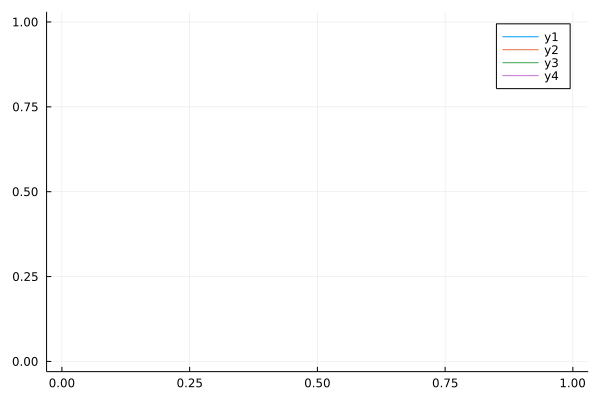

In [20]:
plot(4)

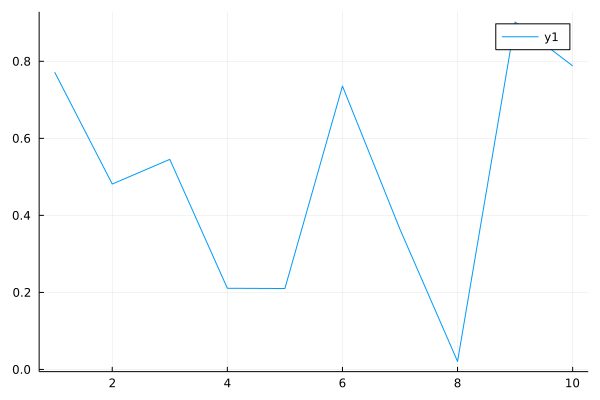

In [21]:
plot(rand(10))

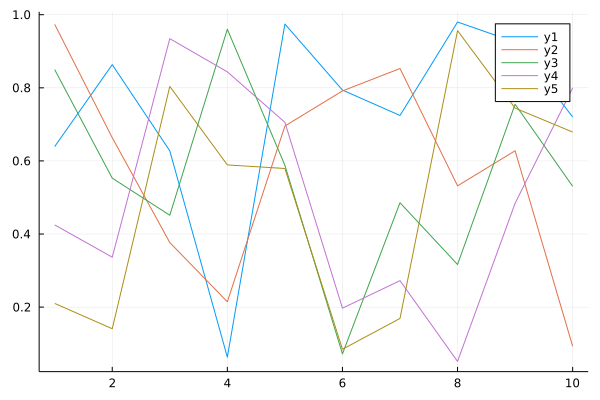

In [22]:
plot(rand(10,5))

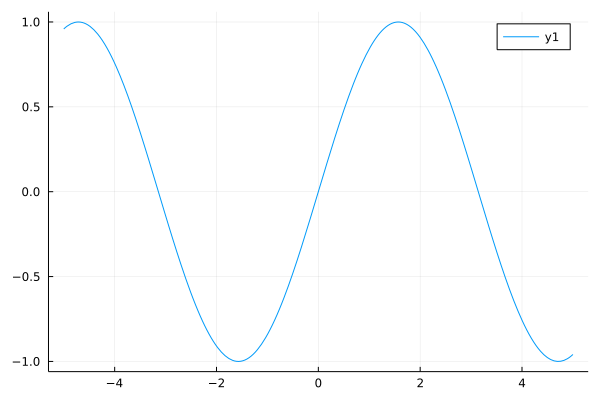

In [23]:
plot(sin)

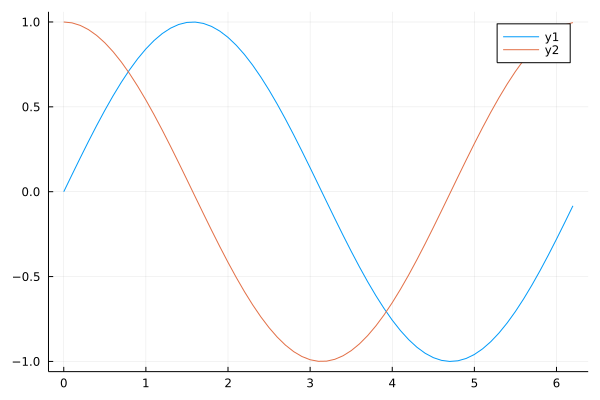

In [26]:
plot([sin,cos], 0:0.1:2pi)

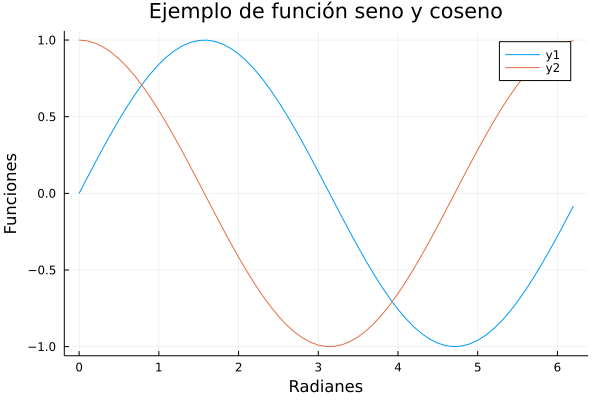

In [29]:
plot!(title="Ejemplo de función seno y coseno")
xlabel!("Radianes")
ylabel!("Funciones")

## Expresiones extras

In [36]:
x = range(0, 10, length = 20)
y3 = @. sin(x)^2-1/2; # Esto hace que evalue la regla para cada elemento del arreglo, en este caso para x.

## De forma explícita ##

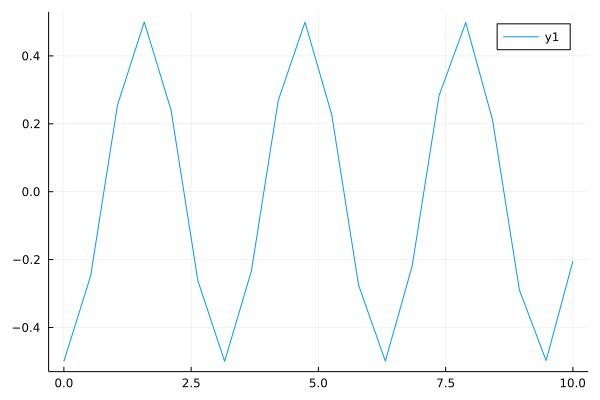

In [37]:
plot(x,y3)

In [33]:
?@

search: @ @doc @cmd @gif @warn @view @time @task @sync @simd @show @lock @info



```
@
```

The at sign followed by a macro name marks a macro call. Macros provide the ability to include generated code in the final body of a program. A macro maps a tuple of arguments, expressed as space-separated expressions or a function-call-like argument list, to a returned *expression*. The resulting expression is compiled directly into the surrounding code. See [Metaprogramming](@ref man-macros) for more details and examples.


In [38]:
?@time

```
@time
```

A macro to execute an expression, printing the time it took to execute, the number of allocations, and the total number of bytes its execution caused to be allocated, before returning the value of the expression. Any time spent garbage collecting (gc) or compiling is shown as a percentage.

In some cases the system will look inside the `@time` expression and compile some of the called code before execution of the top-level expression begins. When that happens, some compilation time will not be counted. To include this time you can run `@time @eval ...`.

See also [`@timev`](@ref), [`@timed`](@ref), [`@elapsed`](@ref), and [`@allocated`](@ref).

!!! note
    For more serious benchmarking, consider the `@btime` macro from the BenchmarkTools.jl package which among other things evaluates the function multiple times in order to reduce noise.


```julia-repl
julia> x = rand(10,10);

julia> @time x * x;
  0.606588 seconds (2.19 M allocations: 116.555 MiB, 3.75% gc time, 99.94% compilation time)

julia> @time x * x;
  0.000009 seconds (1 allocation: 896 bytes)

julia> @time begin
           sleep(0.3)
           1+1
       end
  0.301395 seconds (8 allocations: 336 bytes)
2
```


In [42]:
??plot()

The main plot command. Use `plot` to create a new plot object, and `plot!` to add to an existing one:

```
    plot(args...; kw...)                  # creates a new plot window, and sets it to be the current
    plot!(args...; kw...)                 # adds to the `current`
    plot!(plotobj, args...; kw...)        # adds to the plot `plotobj`
```

There are lots of ways to pass in data, and lots of keyword arguments... just try it and it will likely work as expected. When you pass in matrices, it splits by columns. To see the list of available attributes, use the `plotattr(attr)` function, where `attr` is the symbol `:Series`, `:Subplot`, `:Plot`, or `:Axis`. Pass any attribute to `plotattr` as a String to look up its docstring, e.g., `plotattr("seriestype")`.


### Creando más funciones (continuación)...

Más funciones:

- `readline()` nos lee la línea para tomar valores del usuario, lee cadenas (strings), para leer números es necesario utilizar parse.

- `parse()` pasa una cadena a un número.

#### Ejemplos:

1. Celcius a Farenheit.
2. Saludar con el nombre del usuario.
3. Calcular $3x^2+4$ con un valor dado por el usuario (uso de parse)

## Jerarquía de operaciones 

+,-,*,/,^.

## Operadores relacionales

`>,>=,<,<=, ==, !=`

In [6]:
print("Escribe el inicio del intervalo")
A=parse(Float64,readline())

print("Escribe el final del intervalo")
B=parse(Float64,readline())

print("Escribe un número")
x=parse(Float64,readline())

if x>A && x<=B
    println("Esta en el intervalo")
else
    println("No esta en el intervalo")
end


stdin> 5
stdin> 9
stdin> 10
Escribe el inicio del intervaloEscribe el final del intervaloEscribe un númeroNo esta en el intervalo


## Más operadores lógicos:
- AND: &&
- OR: ||

## Lectura y escritura de archivos:

In [9]:
ruta_arch = "prueba.txt"
open(ruta_arch, "w") do varArc # La instrucción "w" sobreescribe el archivo existente.
    write(varArc, "A, B, C, D\n") # \n <- Quiere decir línea nueva
end

11

In [7]:
?varArc

search: Vararg

Couldn't find varArc
Perhaps you meant Vararg or varinfo


No documentation found.

Binding `varArc` does not exist.


### Para evitar sobreescribir, usar "a"

In [11]:
ruta_arch = "prueba2.txt"
open(ruta_arch, "a") do varArc # La instrucción "w" sobreescribe el archivo existente.
    for i=1:25
        write(varArc, "E, F, G, H\n") # \n <- Quiere decir línea nueva
    end
end

In [12]:
ruta_arch = "prueba2.txt"
open(ruta_arch, "a") do varArc # La instrucción "w" sobreescribe el archivo existente.
    for i=1:25
        n1=rand()
        n2=rand()
        n3=rand()
        n4=rand()
        write(varArc, "$n1, $n2, $n3, $n4\n") # \n <- Quiere decir línea nueva
    end
end

## Datos

In [13]:
renglones=open("datos.txt") do varArchivo
    readlines(varArchivo)
end

println(typeof(renglones))
println(renglones[23])

# Lectura de Archivos

In [16]:
varArchivo = open("datos.txt") #En general hay que poner la dirección exacta del archivo a usar.
println(typeof(varArchivo))
close(varArchivo)

IOStream


In [17]:
?IOStream

search: IOStream



```
IOStream
```

A buffered IO stream wrapping an OS file descriptor. Mostly used to represent files returned by [`open`](@ref).


In [21]:
open("datos.txt") do varArchivo
    s = read(varArchivo, String)
    print(s)
    print(typeof(s))
end

0.28698701935132365, 0.1922077311746726, 0.5989582517270847, 0.6602467159972538
0.3388437552587975, 0.81682327302532, 0.2884681347609235, 0.15414706634606057
0.7831150619914692, 0.6254622072980544, 0.10345740238568313, 0.19273530737489808
0.9823544467167595, 0.6974955603059689, 0.17528066712952273, 0.5914928614683324
0.11959415288473219, 0.45054993114190267, 0.8459474055389733, 0.9975280434763434
0.09173419815021544, 0.5759516581406872, 0.3519197382190594, 0.7947253798187582
0.7716904844109589, 0.6212724716761845, 0.38034268031000706, 0.7381408223648136
0.6402221575227652, 0.33864749804551686, 0.8339522714071487, 0.3641060110023676
0.7518598855752565, 0.6941472411350688, 0.014747894039599085, 0.13552083189383934
0.3928099460498826, 0.1949398332434923, 0.651492311410869, 0.7178939617627704
0.14637725017134284, 0.13883908834855652, 0.2773422832583806, 0.5078030430789578
0.45494298127328925, 0.0833830277622939, 0.9478456146980109, 0.8299863984487796
0.34415120173899005, 0.6517975459242958

In [23]:
println(typeof(varArchivo))

IOStream


In [25]:
s

LoadError: UndefVarError: s not defined

In [24]:
read(varArchivo, String)

""

In [29]:
?do

search: do Docs download DomainError @doc Cdouble stdout @__dot__



```
do
```

Create an anonymous function and pass it as the first argument to a function call. For example:

```julia
map(1:10) do x
    2x
end
```

is equivalent to `map(x->2x, 1:10)`.

Use multiple arguments like so:

```julia
map(1:10, 11:20) do x, y
    x + y
end
```


In [28]:
s=open("datos.txt") do varArchivo
    read(varArchivo,String)
end

print(s)

0.28698701935132365, 0.1922077311746726, 0.5989582517270847, 0.6602467159972538
0.3388437552587975, 0.81682327302532, 0.2884681347609235, 0.15414706634606057
0.7831150619914692, 0.6254622072980544, 0.10345740238568313, 0.19273530737489808
0.9823544467167595, 0.6974955603059689, 0.17528066712952273, 0.5914928614683324
0.11959415288473219, 0.45054993114190267, 0.8459474055389733, 0.9975280434763434
0.09173419815021544, 0.5759516581406872, 0.3519197382190594, 0.7947253798187582
0.7716904844109589, 0.6212724716761845, 0.38034268031000706, 0.7381408223648136
0.6402221575227652, 0.33864749804551686, 0.8339522714071487, 0.3641060110023676
0.7518598855752565, 0.6941472411350688, 0.014747894039599085, 0.13552083189383934
0.3928099460498826, 0.1949398332434923, 0.651492311410869, 0.7178939617627704
0.14637725017134284, 0.13883908834855652, 0.2773422832583806, 0.5078030430789578
0.45494298127328925, 0.0833830277622939, 0.9478456146980109, 0.8299863984487796
0.34415120173899005, 0.6517975459242958

In [30]:
s

"0.28698701935132365, 0.1922077311746726, 0.5989582517270847, 0.6602467159972538\n0.3388437552587975, 0.81682327302532, 0.2884681347609235, 0.15414706634606057\n0.7831150619914692, 0.6254622072980544, 0.10345740238568313, 0.19273530737489808\n0.9823544467167595, 0.697495560" ⋯ 1467 bytes ⋯ "031364263508, 0.7307695867793751\n0.5848170145124465, 0.5302261781807887, 0.477206442037016, 0.9243412475248058\n0.9422619720686893, 0.8195303136093083, 0.666564175786217, 0.7161603447790089\n0.45700832191096874, 0.9552455712867981, 0.014076720675760379, 0.425290889806917\n"

In [31]:
?readlines

search: readlines readline readlink



```
readlines(io::IO=stdin; keep::Bool=false)
readlines(filename::AbstractString; keep::Bool=false)
```

Read all lines of an I/O stream or a file as a vector of strings. Behavior is equivalent to saving the result of reading [`readline`](@ref) repeatedly with the same arguments and saving the resulting lines as a vector of strings.

# Examples

```jldoctest
julia> open("my_file.txt", "w") do io
           write(io, "JuliaLang is a GitHub organization.\nIt has many members.\n");
       end
57

julia> readlines("my_file.txt")
2-element Vector{String}:
 "JuliaLang is a GitHub organization."
 "It has many members."

julia> readlines("my_file.txt", keep=true)
2-element Vector{String}:
 "JuliaLang is a GitHub organization.\n"
 "It has many members.\n"

julia> rm("my_file.txt")
```


In [50]:
ruta_arch = "datos2.txt"
open(ruta_arch, "a") do varArc # La instrucción "w" sobreescribe el archivo existente.
    for i=1:25
        n1=rand()
        write(varArc, "$n1\n") # \n <- Quiere decir línea nueva
    end
end

In [38]:
function parse2numbers(renglon)
    for i in range(0,size(renglon))
        renglon[i]=parse(Float64,renglon[i])
    end
end

parse2numbers (generic function with 1 method)

In [39]:
parse2numbers(renglones[1])

LoadError: MethodError: no method matching size(::String)
[0mClosest candidates are:
[0m  size([91m::Union{LinearAlgebra.Adjoint{T, var"#s859"}, LinearAlgebra.Transpose{T, var"#s859"}} where {T, var"#s859"<:(AbstractVector)}[39m) at C:\ProgramData\Julia-1.7.2\share\julia\stdlib\v1.7\LinearAlgebra\src\adjtrans.jl:172
[0m  size([91m::Union{LinearAlgebra.Adjoint{T, var"#s859"}, LinearAlgebra.Transpose{T, var"#s859"}} where {T, var"#s859"<:(AbstractMatrix)}[39m) at C:\ProgramData\Julia-1.7.2\share\julia\stdlib\v1.7\LinearAlgebra\src\adjtrans.jl:173
[0m  size([91m::Union{LinearAlgebra.QR, LinearAlgebra.QRCompactWY, LinearAlgebra.QRPivoted}[39m) at C:\ProgramData\Julia-1.7.2\share\julia\stdlib\v1.7\LinearAlgebra\src\qr.jl:567
[0m  ...

In [44]:
function promedio2YSuma(a,b,c)
    suma = a+b+c
    promedio = suma/3
    promedio,suma
end

promedio2YSuma (generic function with 1 method)

In [45]:
promedio2YSuma(1,2,3)

(2.0, 6)

In [ ]:
renglones=open("datos.txt") do varArchivo
    readlines(varArchivo)
end

println(typeof(renglones))
println(renglones[23])

In [51]:
promedio, suma=open("datos2.txt") do varArchivo
    var1 = 0
    var2 = 0
    for linea in eachline(varArchivo)
        println("$(length(linea)), $(linea)")
        var1 = var1 + parse(Float64,linea)
        var2 = var2 + 1
    end
    (var1/var2,var1)
end
println(promedio,suma)

19, 0.07790244885572184
19, 0.18495490703117468
18, 0.5166958193111334
18, 0.5200151551513539
18, 0.4175693788638257
19, 0.08942553426762989
18, 0.2017183009457344
18, 0.6615403108298858
19, 0.12112045264621973
18, 0.5755429380467075
17, 0.262341644651388
19, 0.11948396113798587
19, 0.13276092531995642
18, 0.3423953269482871
18, 0.8341881672168525
19, 0.23315979088342498
18, 0.7119942372067315
19, 0.45721015629816486
17, 0.899425016681896
18, 0.2406793155316641
19, 0.15514896753599394
19, 0.31635626422591323
18, 0.8114176115825327
18, 0.5450669595132167
18, 0.4009077748857798
0.3931608546227679.829021365569176


# Tarea: Recuperar los números de una string